In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
np.random.seed(234)

# Data processing


In [ ]:
# helper function for text preprocessing
import re
import nltk
# stemming process
stemmer = nltk.stem.SnowballStemmer('english')
# remove the non-alphabetic characters
text_cleaning_regex = "@S+|https?:S+|http?:S|[^A-Za-z0-9]+"

def clean_text(text, stem=True):
  # Text passed to the regex equatio
  text = re.sub(text_cleaning_regex, ' ', str(text).lower()).strip()
  # Empty list created to store final processed words
  tokens = []
  for token in text.split():
    if stem:
      tokens.append(stemmer.stem(token))
    else:
      tokens.append(token)
  return " ".join(tokens)

## 20 newsgroup

In [ ]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', remove=(['headers', 'footers', 'quotes']))
twenty_test = fetch_20newsgroups(subset='test', remove=(['headers', 'footers', 'quotes']))
print("Train data size:", len(twenty_train.data))
print("Test data size:", len(twenty_test.data))
print("Number of categories:", np.max(twenty_train.target)+1)


Train data size: 11314
Test data size: 7532
Number of categories: 20


In [ ]:
news_train = pd.DataFrame([twenty_train.data, twenty_train.target.tolist()]).T
news_train.columns = ['text', 'target']
news_train.text = news_train.text.apply(lambda x: clean_text(x))
news_test = pd.DataFrame([twenty_test.data, twenty_test.target.tolist()]).T
news_test.columns = ['text', 'target']
display(news_train)

,text,target
0,i was wonder if anyon out there could enlighte...,7
1,a fair number of brave soul who upgrad their s...,4
2,well folk my mac plus final gave up the ghost ...,4
3,do you have weitek s address phone number i d ...,1
4,from articl c5owcb n3p world std com by tombak...,14
...,...,...
11309,dn from nyeda cnsvax uwec edu david nye dn a n...,13
11310,i have a veri old mac 512k and a mac plus both...,4
11311,i just instal a dx2 66 cpu in a clone motherbo...,3
11312,wouldn t this requir a hyper sphere in 3 space...,1


Class balance is an important criterion when we are working on classification problems. It is essential to ensure that the classes are not very skewed, and the class imbalance will lead to biased results. The figure shows that our training data are evenly distrubuted among the 20 categories.

Text(0.5, 1.0, '20newsgroup distribution')

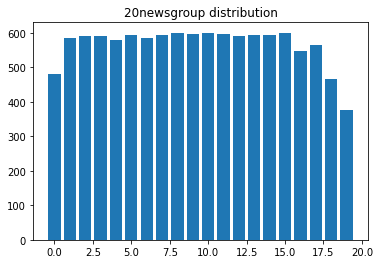

In [ ]:
distribution = np.bincount(twenty_train.target)
x_axis = np.arange(20)
plt.bar(x_axis, distribution)
plt.title('20newsgroup distribution')

Text preprocessing, tokenizing and filtering of stopwords are all included in `CountVectorizer`, which builds a dictionary of features and transforms documents to feature vectors

In [ ]:
# Bag of words representation
from sklearn.feature_extraction.text import CountVectorizer   
vect = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,3), max_features=1000000)

x_train_count = vect.fit_transform(news_train.text)
y_train = twenty_train.target
print(vect.vocabulary_.get(u'algorithm'))

x_test_count = vect.transform(news_test.text)
y_test = twenty_test.target

26167


Occurrence count has the potential problem of discrepancies, to avoid this we can try Term Frequencies. Another refinement on top of `tf` is to downscale weights for words that occur in many documents and are therefore less informative than those that occur only in a smaller portion of the corpus.

This downscaling is called `tf–idf` for “Term Frequency times Inverse Document Frequency”

In [ ]:
# Term Frequency times Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

x_train_tfidf = tfidf_transformer.fit_transform(x_train_count)
x_test_tfidf = tfidf_transformer.transform(x_test_count)
print("Shape of feature matrix:", x_train_tfidf.shape)

Shape of feature matrix: (11314, 1000000)


In [ ]:
news_train_text_transformed = model.transform(news_train_text)
news_train_text_transformed[:5, :5]
# y_train.shape
# news_train.text

array([[-0.00415066, -0.00463776,  0.00110446, -0.00229285, -0.00026437],
       [ 0.00071668, -0.00219703,  0.00234007, -0.00236696,  0.00318006],
       [-0.00437066, -0.00275868,  0.00296669, -0.00327352,  0.00465234],
       [ 0.00214252,  0.0041763 ,  0.00280588, -0.00062875, -0.00465327],
       [-0.00362935,  0.00250868,  0.00353773, -0.00455374, -0.00300275]],
      dtype=float32)

## Sentiment140
The first column is the target column, which will denote the sentiment of the tweets (0/2/4). In this experiment, the focus is on classifying the sentiment of the text. Hence, we can drop the unnecessary columns.

In [ ]:
# need to upload files to read data
senti_train = pd.read_csv("training.csv", engine='python', encoding='ISO-8859-1', header=None)#,error_bad_lines=False)
senti_train.columns = ['polarity','id','date','query','user','text']
senti_train = senti_train.drop(['id','date','query','user'], axis=1)

senti_test = pd.read_csv("testdata.csv", engine='python', encoding='ISO-8859-1', header=None)
senti_test.columns = ['polarity','id','date','query','user','text']
senti_test = senti_test.drop(['id','date','query','user'], axis=1)
senti_train.head(8)

,polarity,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...


The figure shows that our training set distribution is not skewed, but we don't have instances for neural tweets.

Train data size: 1600000
Test data size: 359


Text(0.5, 1.0, 'Tweet sentiment distribution')

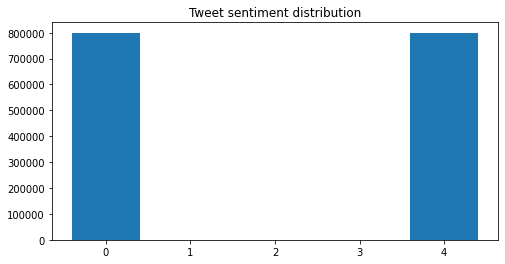

In [ ]:
print("Train data size:",len(senti_train))
print("Test data size:",len(senti_test))
distribution = senti_train.polarity.value_counts()
plt.figure(figsize=(8,4))
plt.bar(distribution.index, distribution.values)
plt.title('Tweet sentiment distribution')

text pre-processing

In [ ]:
senti_train.text = senti_train.text.apply(lambda x: clean_text(x))
senti_test.text = senti_test.text.apply(lambda x: clean_text(x))
display(senti_train.head(8))

,polarity,text
0,0,switchfoot http twitpic com 2y1zl awww that s ...
1,0,is upset that he can t updat his facebook by t...
2,0,kenichan i dive mani time for the ball manag t...
3,0,my whole bodi feel itchi and like it on fire
4,0,nationwideclass no it s not behav at all i m m...
5,0,kwesidei not the whole crew
6,0,need a hug
7,0,loltrish hey long time no see yes rain a bit o...


In [ ]:
vect = CountVectorizer(lowercase=True, stop_words='english')
x2_train_count = vect.fit_transform(senti_train.text)
x2_train = tfidf_transformer.fit_transform(x2_train_count)
y2_train = senti_train.polarity.to_numpy()

x2_test_count = vect.transform(senti_test.text)
x2_test = tfidf_transformer.transform(x2_test_count)
y2_test = senti_test.polarity.to_numpy()

print("Shape of feature matrix:", x2_train.shape)

Shape of feature matrix: (1600000, 605773)


# Model implementation


## Naive Bayes

In multinomial naive bayes, we sum up the instances for each category and use this value for the calculation of probability for each category. 


In prediction step, we calculate the prior and posterior probability for each test data, which will be used for categorize test data. 

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.utils.validation import check_X_y, check_array

# Multinomial Naive Bayes
class NaiveBayes:
    
    def __init__(self, alpha=0.1):
      self.prior = None
      self.word_counts = None
      self.lk_word = None
      self.alpha = alpha
      self.is_fitted_ = False
      return
    
    def fit(self, x, y):
      N, D = x.shape
      C = np.max(y) + 1
      word_count= np.zeros((C,D))
      Nc = np.zeros(C)
      X_by_class = np.array([x[y == c] for c in range(C)])
      for c in range(C):
         x_c = x[y == c]   
         Nc[c] = X_by_class[c].shape[0]
         word_count[c,:] = np.sum(X_by_class[c],axis=0) 
      self.pi = (Nc+self.alpha)/(N+D+1)
      self.theta_one = word_count+self.alpha
      self.theta_two = self.alpha*D+C
      return self

In [ ]:
def logsumexp(Z):                                             # dimension C x N
    Zmax = np.max(Z,axis=0)[None,:]                           # max over C
    log_sum_exp = Zmax + np.log(np.sum(np.exp(Z - Zmax), axis=0))
    return log_sum_exp


def predict(self, xt):
     Nt, D = xt.shape
     # for numerical stability we work in the log domain
     # we add a dimension because this is added to the log-likelihood matrix 
     # that assigns a likelihood for each class (C) to each test point, and so it is C x N
     log_prior = np.log(self.pi)[:, None]

     C,D_theta = self.theta_one.shape
     #xx_test = csr_matrix(xt)
     log_likelihood = np.zeros((Nt,C))
     log_theta = np.log(self.theta_one) - np.log(self.theta_two)
     for i in range(C):
         log_likelihood[:,i] = (xt.multiply(csr_matrix(log_theta[i]))).sum(axis=1).reshape(((xt.multiply(csr_matrix(log_theta[i]))).sum(axis=1)).shape[0],)[0] 
         #mult = mult.sum(axis=1)
         #log_likelihood[:,i] = mult.reshape(mult.shape[0],)[0] 
         #del mult
        
     log_likelihood = log_likelihood.T

     # log_likelihood = np.sum(log_likelihood, axis=2)
     # posterior calculation
     log_posterior = log_prior + log_likelihood
     posterior = np.exp(log_posterior - logsumexp(log_posterior))
     return np.argmax(posterior.T, 1)

NaiveBayes.predict = predict

## K-fold cross validaton

K-fold cross validation is a useful technique to reuse data for validation and test set. By splitting data into different set, we can tune the hyperparameter for better performance on the test set. 

In [ ]:
loss = lambda y, yh: np.mean((y-yh)**2)

def evaluate_acc(y_pred, y_true):
    sum = np.sum(y_pred == y_true) / len(y_true)
    return sum 


def cross_validation_split(X_train_tfidf, Y_train, X_test_tfidf, Y_test, num_folds): 
  # according to the assignment all that we take is the data as entry
  #num_folds = 10
  (num_instances, num_features), num_classes = X_train_tfidf.shape, np.max(Y_train)+1
  n_test, n_valid = num_instances // num_folds, num_instances // num_folds
  inds = np.random.permutation(num_instances)
  inds_1 = np.random.permutation(n_test)
  if n_valid > X_test_tfidf.shape[0]:
      n_valid = X_test_tfidf.shape[0]
      inds_2 = np.random.permutation(n_valid)
  else:
      inds_2 = inds_1
  x_test, y_test = X_test_tfidf[inds_2[:n_valid]], Y_test[inds_2[:n_valid]]
  x_rest, y_rest = X_train_tfidf[inds[:n_test],:], Y_train[inds[:n_test]]

  return x_test, y_test, x_rest, y_rest


def cross_validate(input_data, k_fold):
  cv_data = []
  fold = input_data // k_fold  
  
  for f in range(k_fold):
    tr_inds = []
    cv_data = []
    val_inds = list(range(f * fold, (f+1)*fold))
    if f > 0:
      tr_inds = list(range(f*fold))
    if f < k_fold - 1:
      tr_inds = tr_inds + list(range((f+1)*fold, input_data))
    yield tr_inds, val_inds


def kfold_cv (x_test, y_test, x_rest, y_rest, model):
  result = 0
  num_instances = x_rest.shape[0]
  test_error = np.zeros(len(K_list))
  validation_error = np.zeros((len(K_list), num_folds))
  for f, (tr, val) in enumerate(cross_validate(num_instances, num_folds)):
      model.fit(x_rest[tr], y_rest[tr])
      y_prob = model.predict(x_rest[val])
      #y_pred = np.argmax(y_prob, 1)
      validation_error[i, f] = 1-evaluate_acc(y_prob, y_rest[val])
    #this is the part that we don't do in a usual setup. We don't touch the test set until the very end. 
  model.fit(x_rest, y_rest)
  y_prob = model.predict(x_test)
  #y_pred = np.argmax(y_prob, 1)
  result = evaluate_acc(y_prob, y_test)
  test_error[i]= 1-evaluate_acc(y_prob, y_test)
  print(result)
  return validation_error[i], test_error[i]


# Hyperparameter tuning

## 20 newsgroup

By 5-fold cross validation we found the best NB model is when alpha=0.007, which gave accuracy 0.54. This is an acceptable result based on accuracy 0.61 got from the built-in Mutinomial NB classifier.

0.5128205128205128
0.5212201591511937
0.5344827586206896
0.5358090185676393
0.5384615384615384
0.5362511052166224
0.537577365163572
0.5349248452696729
0.53315649867374
0.5322723253757736
0.5318302387267905
0.5318302387267905
0.5300618921308576


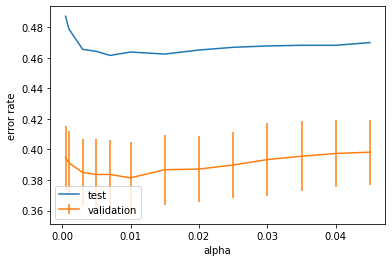

In [ ]:
#print(CV_data)
num_folds = 5
x_test_after, y_test_after, x_rest, y_rest = cross_validation_split(x_train_tfidf, y_train, 
                                                                    x_test_tfidf, y_test,num_folds)
K_list = [0.0005,0.001,0.003,0.005,0.007,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045]
test_error = np.zeros(len(K_list))
validation_error = np.zeros((len(K_list), num_folds))
for i, K in enumerate(K_list):
  validation_error[i], test_error[i] = kfold_cv(x_test_after, y_test_after, x_rest, y_rest, NaiveBayes(K))
  
plt.plot(K_list, test_error, label='test')
plt.errorbar(K_list, np.mean(validation_error, axis=1), np.std(validation_error, axis=1), label='validation')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('error rate')
plt.show()

In [ ]:
# use built-in MultinomialNB to compare accuracy performance
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)
y_pred_class = nb.predict(x_test_tfidf)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.6100637280934679

## Sentiment140
By 5-fold cross validation we found the best NB model is when alpha = 13, which gave accuracy 0.83. This is an acceptable result based on accuracy 0.79 got from the built-in Mutinomial NB classifier.

(1600000, 605773)
0.8050139275766016
0.8217270194986073
0.8161559888579387
0.8050139275766016
0.8105849582172702
0.8161559888579387
0.8272980501392758
0.8272980501392758
0.8272980501392758
0.8217270194986073
0.8217270194986073


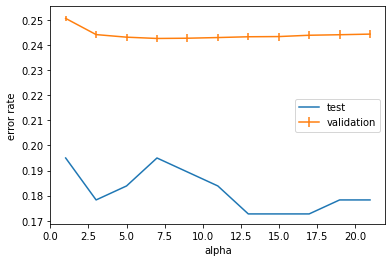

In [ ]:
print(x2_train.shape)
num_folds = 5
x_test_after, y_test_after, x_rest, y_rest = cross_validation_split(x2_train, y2_train, 
                                                                    x2_test, y2_test,num_folds)
K_list = [1,3,5,7,9,11,13,15,17,19,21]
test_error = np.zeros(len(K_list))
validation_error = np.zeros((len(K_list), num_folds))
for i, K in enumerate(K_list):
  validation_error[i], test_error[i] = kfold_cv(x_test_after, y_test_after, x_rest, y_rest, NaiveBayes(K))

plt.plot(K_list, test_error, label='test')
plt.errorbar(K_list, np.mean(validation_error, axis=1), np.std(validation_error, axis=1), label='validation')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('error rate')
plt.show()

In [ ]:
# use built-in MultinomialNB to compare accuracy performance
nb.fit(x2_train, y2_train)
y2_pred_class = nb.predict(x2_test)
metrics.accuracy_score(y2_test, y2_pred_class)

0.7883008356545961

## Logistic regression 

For logistic regression, we used the method directly from sklearn library and tuned hyperparameter: c_values and solvers. 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
c_values = [100, 10, 1, 0.1, 0.01, 0.05] #hyperparameter for logstic regression
solvers = ['newton-cg', 'lbfgs', 'liblinear'] # different algorithm for logstic regression


### 20 news

In [ ]:

data1_res1=[]
data1_res2=[]
data1_res3=[]

for c in c_values:
  ini = LogisticRegression( solver=solvers[0], C=c)
  ini.fit(x_train_tfidf, y_train)
  y_pred = ini.predict(x_test_tfidf)
  data1_res1.append(evaluate_acc(y_pred, y_test))

for c in c_values:
  ini = LogisticRegression( solver=solvers[1],C=c, max_iter=5000)
  ini.fit(x_train_tfidf, y_train)
  y_pred = ini.predict(x_test_tfidf)
  data1_res2.append(evaluate_acc(y_pred, y_test))
for c in c_values:
  ini = LogisticRegression(solver=solvers[2], C=c)
  ini.fit(x_train_tfidf, y_train)
  y_pred = ini.predict(x_test_tfidf)
  data1_res3.append(evaluate_acc(y_pred, y_test))

print(data1_res1)
print(data1_res2)
print(data1_res3)

# cost too much time , don't run again 
# result:
#[0.6990175252257037, 0.7010090281465746, 0.6868029739776952, 0.6342272968667021, 0.5005310674455656, 0.6087360594795539]
#[0.6990175252257037, 0.7010090281465746, 0.6869357408390866, 0.6340945300053107, 0.5005310674455656, 0.6086032926181625]
#[0.7027349973446628, 0.700477960701009, 0.6854753053637812, 0.6336962294211365, 0.5430164630908125, 0.611125862984599]

# Because the value difference of each x value is too large, we could not plot a readable graph

'\ndata1_res1=[]\ndata1_res2=[]\ndata1_res3=[]\n\nfor c in c_values:\n  ini = LogisticRegression( solver=solvers[0], C=c)\n  ini.fit(x_train_tfidf, y_train)\n  y_pred = ini.predict(x_test_tfidf)\n  data1_res1.append(evaluate_acc(y_pred, y_test))\n\nfor c in c_values:\n  ini = LogisticRegression( solver=solvers[1],C=c, max_iter=5000)\n  ini.fit(x_train_tfidf, y_train)\n  y_pred = ini.predict(x_test_tfidf)\n  data1_res2.append(evaluate_acc(y_pred, y_test))\nfor c in c_values:\n  ini = LogisticRegression(solver=solvers[2], C=c)\n  ini.fit(x_train_tfidf, y_train)\n  y_pred = ini.predict(x_test_tfidf)\n  data1_res3.append(evaluate_acc(y_pred, y_test))\n\nprint(data1_res1)\nprint(data1_res2)\nprint(data1_res3)\n'

###sentiment140

In [ ]:
data2_res1=[]
data2_res2=[]
data2_res3=[]
#in this experiment we found that 'newton-cg', 'lbfgs', 'liblinear' would not  be convergent in limiting iteration
#the large size of this dataset may be the cause.
#but it still give proper result
#use sag solver could converge faster but its accuracy be lower.

c2=[1, 0.1, 0.01, 0.05]
for c in c2:
  ini = LogisticRegression( solver=solvers[0], C=c)
  ini.fit(x2_train, y2_train)
  y_pred = ini.predict(x2_test)
  data2_res1.append(evaluate_acc(y_pred, y2_test))

for c in c2:
  ini = LogisticRegression( solver=solvers[1], C=c)
  ini.fit(x2_train, y2_train)
  y_pred = ini.predict(x2_test)
  data2_res2.append(evaluate_acc(y_pred, y2_test))

for c in c2:
  ini = LogisticRegression( solver=solvers[2], C=c)
  ini.fit(x2_train, y2_train)
  y_pred = ini.predict(x2_test)
  data2_res3.append(evaluate_acc(y_pred, y2_test))


print(data2_res1)
print(data2_res2)
print(data2_res2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.807799442896936, 0.8161559888579387, 0.7883008356545961, 0.8105849582172702]
[0.8022284122562674, 0.8161559888579387, 0.7883008356545961, 0.8105849582172702]
[0.8022284122562674, 0.8161559888579387, 0.7883008356545961, 0.8105849582172702]


# Different data size

In [ ]:
def mycross_validation_split(X_train_tfidf, Y_train, X_test_tfidf, Y_test): 
  # according to the assignment all that we take is the data as entry
  num_folds = 1
  (num_instances, num_features), num_classes = X_train_tfidf.shape, np.max(Y_train)+1
  n_test, n_valid = num_instances // num_folds, num_instances // num_folds
  inds = np.random.permutation(num_instances)
  inds_1 = np.random.permutation(n_test)
  if n_valid > X_test_tfidf.shape[0]:
    n_valid = X_test_tfidf.shape[0]
    inds_2 = np.random.permutation(n_valid)
  else:
    inds_2 = inds_1
  x_test, y_test = X_test_tfidf[inds_2[:n_valid]], Y_test[inds_2[:n_valid]]
  x_rest, y_rest = X_train_tfidf[inds[:n_test],:], Y_train[inds[:n_test]]

  return x_test, y_test, x_rest, y_rest
def split_train(x_trainset,y_trainset, x, y, percentage):

  x111,y111,x221,y221=mycross_validation_split(x_trainset, y_trainset, x, y)
  
  num_index = int(x_trainset.shape[0]*percentage/100)
  
  x_train_res, y_train_res = x111[:num_index], y111[:num_index]
  return x_train_res, y_train_res  

In [ ]:
x1_20_train, y1_20_train = split_train(x_train_tfidf,y_train,x_train_tfidf,y_train, 20)
x1_40_train, y1_40_train = split_train(x_train_tfidf,y_train,x_train_tfidf,y_train, 40)
x1_60_train, y1_60_train = split_train(x_train_tfidf,y_train,x_train_tfidf,y_train, 60)
x1_80_train, y1_80_train = split_train(x_train_tfidf,y_train,x_train_tfidf,y_train, 80)


In [ ]:
y1_acc=[]
model1 = NaiveBayes(0.025)

model1.fit(x1_20_train, y1_20_train)#20% train size
y_pred=model1.predict(x_test_tfidf)
y1_acc.append(evaluate_acc(y_pred,y_test))

model1.fit(x1_40_train, y1_40_train)#40% train size
y_pred=model1.predict(x_test_tfidf)
y1_acc.append(evaluate_acc(y_pred,y_test))

model1.fit(x1_60_train, y1_60_train)#60% train size
y_pred=model1.predict(x_test_tfidf)
y1_acc.append(evaluate_acc(y_pred,y_test))

model1.fit(x1_80_train, y1_80_train)#80% train size
y_pred=model1.predict(x_test_tfidf)
y1_acc.append(evaluate_acc(y_pred,y_test))

model1.fit(x_train_tfidf, y_train)#100% train size
y_pred=model1.predict(x_test_tfidf)
y1_acc.append(evaluate_acc(y_pred,y_test))

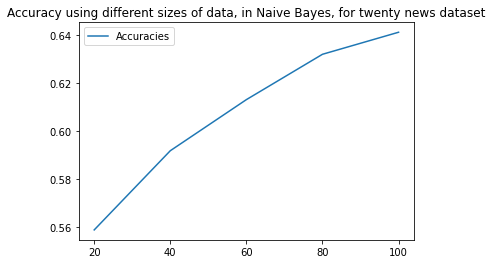

The highest accuracy is 0.6411311736590547 with 100% data size


In [ ]:
plt.xticks([20,40,60,80,100])
plt.title("Accuracy using different sizes of data, in Naive Bayes, for twenty news dataset")
plt.plot([20,40,60,80,100],y1_acc, '-', label="Accuracies")
plt.legend()
plt.show()
print('The highest accuracy is',y1_acc[4],'with 100% data size')

In [ ]:
y1b_acc=[]
model2 = LogisticRegression(solver=solvers[2], C=10)

model2.fit(x1_20_train, y1_20_train)#20% train size
y_pred=model2.predict(x_test_tfidf)
y1b_acc.append(evaluate_acc(y_pred,y_test))

model2.fit(x1_40_train, y1_40_train)#40% train size
y_pred=model2.predict(x_test_tfidf)
y1b_acc.append(evaluate_acc(y_pred,y_test))

model2.fit(x1_60_train, y1_60_train)#60% train size
y_pred=model2.predict(x_test_tfidf)
y1b_acc.append(evaluate_acc(y_pred,y_test))

model2.fit(x1_80_train, y1_80_train)#80% train size
y_pred=model2.predict(x_test_tfidf)
y1b_acc.append(evaluate_acc(y_pred,y_test))

model2.fit(x_train_tfidf, y_train)#100% train size
y_pred=model2.predict(x_test_tfidf)
y1b_acc.append(evaluate_acc(y_pred,y_test))

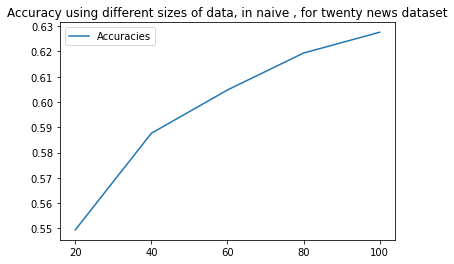

The highest accuracy is 0.6275889537971322 with 100% data size


In [ ]:
plt.xticks([20,40,60,80,100])
plt.title("Accuracy using different sizes of data, in softmax regression , for twenty news dataset")
plt.plot([20,40,60,80,100],y1b_acc, '-', label="Accuracies")
plt.legend()
plt.show()
print('The highest accuracy is',y1b_acc[4],'with 100% data size')

In [ ]:
x2_20_train, y2_20_train = split_train(x2_train,y2_train,x2_train,y2_train, 20)
x2_40_train, y2_40_train = split_train(x2_train,y2_train,x2_train,y2_train, 40)
x2_60_train, y2_60_train = split_train(x2_train,y2_train,x2_train,y2_train, 60)
x2_80_train, y2_80_train = split_train(x2_train,y2_train,x2_train,y2_train, 80)

In [ ]:
y2a_acc=[]
model1 = NaiveBayes(15)

model1.fit(x2_20_train, y2_20_train)#20% train size
y_pred=model1.predict(x2_test)
y2a_acc.append(evaluate_acc(y_pred,y2_test))

model1.fit(x2_40_train, y2_40_train)#40% train size
y_pred=model1.predict(x2_test)
y2a_acc.append(evaluate_acc(y_pred,y2_test))

model1.fit(x2_60_train, y2_60_train)#60% train size
y_pred=model1.predict(x2_test)
y2a_acc.append(evaluate_acc(y_pred,y2_test))

model1.fit(x2_80_train, y2_80_train)#80% train size
y_pred=model1.predict(x2_test)
y2a_acc.append(evaluate_acc(y_pred,y2_test))

model1.fit(x2_train, y2_train)#100% train size
y_pred=model1.predict(x2_test)
y2a_acc.append(evaluate_acc(y_pred,y2_test))

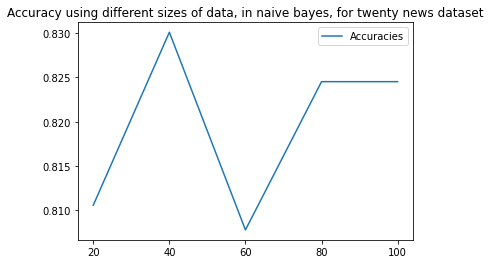

The highest accuracy is 0.8245125348189415 with 60% or 100% data size


In [ ]:
plt.xticks([20,40,60,80,100])
plt.title("Accuracy using different sizes of data, in naive bayes, for sentiment140 dataset")
plt.plot([20,40,60,80,100],y2a_acc, '-', label="Accuracies")
plt.legend()
plt.show()
print('The highest accuracy is',y2a_acc[4],'with 60% or 100% data size')

In [ ]:
y2b_acc=[]
model2 = LogisticRegression(solver=solvers[1], C=10)

model2.fit(x2_20_train, y2_20_train)#20% train size
y_pred=model2.predict(x2_test)
y2b_acc.append(evaluate_acc(y_pred,y2_test))

model2.fit(x2_40_train, y2_40_train)#40% train size
y_pred=model2.predict(x2_test)
y2b_acc.append(evaluate_acc(y_pred,y2_test))

model2.fit(x2_60_train, y2_60_train)#60% train size
y_pred=model2.predict(x2_test)
y2b_acc.append(evaluate_acc(y_pred,y2_test))

model2.fit(x2_80_train, y2_80_train)#80% train size
y_pred=model2.predict(x2_test)
y2b_acc.append(evaluate_acc(y_pred,y2_test))

model2.fit(x2_train, y2_train)#100% train size
y_pred=model2.predict(x2_test)
y2b_acc.append(evaluate_acc(y_pred,y2_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


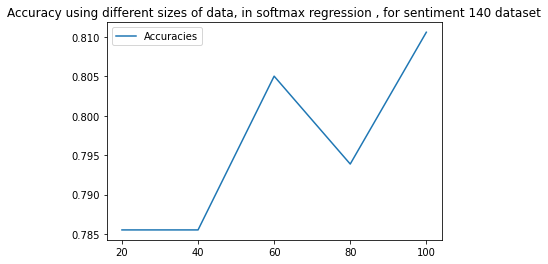

The highest accuracy is 0.8105849582172702 with 60% or 100% data size


In [ ]:
plt.xticks([20,40,60,80,100])
plt.title("Accuracy using different sizes of data, in softmax regression , for sentiment 140 dataset")
plt.plot([20,40,60,80,100],y2b_acc, '-', label="Accuracies")
plt.legend()
plt.show()
print('The highest accuracy is',y2b_acc[4],'with 60% or 100% data size')

# Alternative method

##Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB


In [ ]:
#alternative NB for dataset1
K1_list = [0.007,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045]
res1=[]
for k in K1_list:
  model=MultinomialNB(alpha=k)
  model.fit(x_train_tfidf, y_train)
  prob=model.predict(x_test_tfidf)
  res1.append(evaluate_acc(prob,y_test))
 

In [ ]:
plt.xticks(K1_list)
plt.title("Accuracy using different sizes of data, in mutinomial NB , for sentiment 140 dataset")
plt.plot(K1_list,res1, '-', label="Accuracies")
plt.legend()
plt.show()
best=max(res1)
print('Best accuracy is ',best,'with hyperparameter k=0.025') 

In [ ]:
#alternative NB for dataset2
K2_list = [1,3,5,7,9,11,13,15,17,19,21]
res2=[]
for k in K2_list:
  model=MultinomialNB(alpha=k)
  model.fit(x2_train, y2_train)
  prob=model.predict(x2_test)
  res2.append(evaluate_acc(prob,y2_test))

In [ ]:
plt.xticks(K2_list)
plt.title("Accuracy using different sizes of data, in mutinomial NB , for sentiment 140 dataset")
plt.plot(K2_list,res2, '-', label="Accuracies")
plt.legend()
plt.show()
best=max(res2)
print('Best accuracy is ',best,'with hyperparameter k=21')  

##Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as mm


In [ ]:
model=LinearRegression()


model.fit(x_train_tfidf, y_train)
xlinear=model.predict(x_test_tfidf)

mm.mean_squared_error(y_test,xlinear)

#MSE indicates the accuracy of this method could give, 
#T  he large MSE shows we may not get a very accurate result from this method.  

In [ ]:

model.fit(x2_train, y2_train)
prob=model.predict(x2_test)



In [ ]:
mm.mean_squared_error(y2_test,prob)